# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.model_selection import GridSearchCV

from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm_notebook as tqdm
import os
import pickle

<h1>1. DATA</h1>

In [2]:
data_projects = pd.read_csv('../Datasets/donor_choose_train_data.csv')
data_resources = pd.read_csv('../Datasets/donor_choose_resources.csv')

In [3]:
print("Shape of training dataset =",data_projects.shape)
print("Shape of resources dataset =",data_resources.shape)

Shape of training dataset = (109248, 17)
Shape of resources dataset = (1541272, 4)


In [4]:
print("Columns in train dataset = ",data_projects.columns)
print("*"*50)
print("Columns in resources dataset = ",data_resources.columns)


Columns in train dataset =  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
**************************************************
Columns in resources dataset =  Index(['id', 'description', 'quantity', 'price'], dtype='object')


<h2>1.1 Converting Date time format and sorting Data by Date</h2>

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(data_projects.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
data_projects['Date'] = pd.to_datetime(data_projects['project_submitted_datetime'])
data_projects.drop('project_submitted_datetime', axis=1, inplace=True)
data_projects.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
data_projects = data_projects[cols]


data_projects.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
output_value_counts = data_projects['project_is_approved'].value_counts()
output_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

<h1>2. PREPROCESSING</h1>

In [7]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


<h2>2.1 Project Categories</h2>

In [9]:
#print(list(data_projects['project_subject_categories'].values))

cats = list(data_projects['project_subject_categories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)



data_projects["clean_categories"] = category_list
data_projects.drop(["project_subject_categories"], axis = 1, inplace = True)
# print(data_projects.head(2))

#preprocessing
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll = Counter()
for x in data_projects['clean_categories'].values:
    my_coll.update(x.split())
    
my_coll = dict(my_coll)
print(my_coll)
sorted_coll_dict = dict(sorted(my_coll.items(), key=lambda x: x[1]))
print((sorted_coll_dict))

{'Math_Science': 41421, 'SpecialNeeds': 13642, 'Literacy_Language': 52239, 'AppliedLearning': 12135, 'History_Civics': 5914, 'Music_Arts': 10293, 'Health_Sports': 14223, 'Warmth': 1388, 'Care_Hunger': 1388}
{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


<h2>2.2 Project Subcategories</h2>

In [10]:
cats = list(data_projects['project_subject_subcategories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)    

data_projects["clean_sub_categories"] = category_list
data_projects.drop(["project_subject_subcategories"], axis = 1, inplace = True)
# print(data_projects.head(2))


from collections import Counter
my_coll_sub = Counter()
for x in data_projects['clean_sub_categories'].values:
    my_coll_sub.update(x.split())
    
my_coll_sub = dict(my_coll_sub)
sorted_coll_dict_sub = dict(sorted(my_coll_sub.items(), key=lambda x: x[1]))
print(sorted_coll_dict_sub)


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


<h2> 2.3 Project Essay </h2>


In [11]:
data_projects['essay'] = data_projects['project_essay_1'].map(str) \
                 + data_projects['project_essay_2'].map(str) \
                 + data_projects['project_essay_3'].map(str) \
                 + data_projects['project_essay_4'].map(str)

In [12]:
from tqdm import tqdm
preprocessed_essay = []

for item in tqdm(data_projects['essay'].values):
        it = decontracted(item)
        it = it.replace('\\r', ' ')
        it = it.replace('\\"', ' ')
        it = it.replace('\\n', ' ')
        it = re.sub('[^A-Za-z0-9]+', ' ',it)
        it = ' '.join(e for e in it.split() if e not in stopwords)
        preprocessed_essay.append(it.lower().strip())
        
preprocessed_essay[1000]
data_projects['preprocessed_essays'] = preprocessed_essay

100%|█████████████████████████████████| 109248/109248 [01:49<00:00, 999.57it/s]


<h2> 2.4 PROJECT TITLE</h2>

In [13]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data_projects['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
data_projects['preprocessed_titles'] = preprocessed_titles

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 23075.13it/s]


<h2> 2.5. PROJECT GRADE</h2>

In [14]:
data_projects['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [15]:
data_projects['project_grade_category'] = data_projects['project_grade_category'].str.replace(" ", "_")
data_projects['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

<h2> 2.6. TEACHER PREFIX PREPROCESSING </h2>

In [16]:
data_projects['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [17]:
data_projects['teacher_prefix'] = data_projects['teacher_prefix'].str.replace(".", "")
data_projects['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

In [18]:
data_projects.to_csv("final_data_features.csv", index=False)

In [19]:
if os.path.isfile('final_data_features.csv'):
    data_projects = pd.read_csv("final_data_features.csv")
data_projects.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,Grades_3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old you third grade classroo...,sensory tools focus
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs,CA,2016-04-27 00:46:53,Grades_PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,having class 24 students comes diverse learner...,mobile learning mobile listening center
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,i recently read article giving students choice...,flexible seating flexible learning
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs,WA,2016-04-27 01:05:25,Grades_3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",my students crave challenge eat obstacles brea...,going deep the art inner thinking


<h1> 3. Preparing Data for Models </h1>


In [20]:
y = data_projects['project_is_approved'].values
data_projects.drop(['project_is_approved'], axis = 1, inplace = True)
X = data_projects

In [21]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom


<h2><b> $3.1$ Splitting data into Train and test set</b></h2>

In [75]:
#Since we perform hyper-parameter tuning using gridSearchCV, we need only train set and test set as cross validation set
#is formed while performing internally in gridSearchCV(python sklearn implementation)
#sklearn's gridSearchCV uses 5-fold cross validation as the default cross-validation strategy
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [76]:
print("Shape  of Train dataset :",X_train.shape)
print("***"*10)
print("Shape  of Test dataset :",X_test.shape)

Shape  of Train dataset : (65548, 19)
******************************
Shape  of Test dataset : (43700, 19)


<h2> $3.2$ One Hot Encoding of categorical features: </h2>


In [77]:
data_projects.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'preprocessed_essays',
       'preprocessed_titles'],
      dtype='object')

<h3> 3.2.2. clean_categories: </h3>

In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vec_cat = CountVectorizer(vocabulary=list(sorted_coll_dict.keys()), lowercase=False, binary=True)
vec_cat.fit(X_train['clean_categories'].values)

cat_one_hot_train = vec_cat.transform(X_train['clean_categories'].values)
cat_one_hot_test = vec_cat.transform(X_test['clean_categories'].values)

print(cat_one_hot_train.shape)
print(cat_one_hot_test.shape)
print(vec_cat.get_feature_names())


(65548, 9)
(43700, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h3> 3.2.3 clean_sub_categories:</h3>

In [79]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vec_sub_cat = CountVectorizer(vocabulary=list(sorted_coll_dict_sub.keys()),lowercase=False, binary=True)
vec_sub_cat.fit(X_train['clean_categories'].values)

sub_cat_one_hot_train = vec_sub_cat.transform(X_train['clean_categories'].values)
sub_cat_one_hot_test = vec_sub_cat.transform(X_test['clean_categories'].values)

print(sub_cat_one_hot_train.shape)
print(sub_cat_one_hot_test.shape)
print(vec_sub_cat.get_feature_names())


(65548, 30)
(43700, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


<h3> 3.2.4. school_state </h3>

In [80]:
state = Counter()
for st in data_projects['school_state'].values:
    state.update(st.split())
dict_state = dict(state)
sorted_state_dict = dict(sorted(state.items(), key=lambda x: x[1]))

In [81]:
vec_state = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vec_state.fit(X_train['school_state'].values)

school_state_one_hot_train = vec_state.transform(X_train['school_state'].values)
school_state_one_hot_test = vec_state.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print(vec_state.get_feature_names())

Shape of Train data - one hot encoding (65548, 51)
Shape of Test data - one hot encoding (43700, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


<h3> 3.2.5. PROJECT GRADE CATEGORIES: </h3>

In [82]:
grade = Counter()
for gd in data_projects['project_grade_category'].values:
    grade.update(gd.split())
dict_grade = dict(grade)
sorted_grade_dict = dict(sorted(dict_grade.items(), key=lambda x: x[1]))

In [83]:
vec_grade = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vec_grade.fit(X_train['project_grade_category'].values)

grade_one_hot_train = vec_grade.transform(X_train['school_state'].values)
grade_one_hot_test = vec_grade.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",grade_one_hot_train.shape)
print("Shape of Test data - one hot encoding",grade_one_hot_test.shape)
print(vec_grade.get_feature_names())

Shape of Train data - one hot encoding (65548, 4)
Shape of Test data - one hot encoding (43700, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


<h3> 3.2.6. teacher_prefix </h3>

In [84]:
prefix = Counter()
for tp in data_projects['teacher_prefix'].values:
    tp = str(tp)
    prefix.update(tp.split())

dict_prefix = dict(prefix)
sorted_teacher_prefix_dict = dict(sorted(dict_prefix.items(), key=lambda x: x[1]))

In [85]:
vec_teacher_pre = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vec_teacher_pre.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot_train = vec_teacher_pre.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_test = vec_teacher_pre.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_one_hot_test.shape)
print(vec_teacher_pre.get_feature_names())

Shape of Train data - one hot encoding (65548, 6)
Shape of Test data - one hot encoding  (43700, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


<h2> $3.3.$ Vectorizing Text Data</h2>

<h2> 3.3.1 Bag of Words:</h2>

<h3> 3.3.1.1 Essays:</h3>

In [86]:
#words which appeared in at least 10 documents(rows or projects).
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer/35615151
vec_essay = CountVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vec_essay.fit(X_train["preprocessed_essays"])

train_essay_bow = vec_essay.transform(X_train["preprocessed_essays"])
test_essay_bow = vec_essay.transform(X_test["preprocessed_essays"])

print(train_essay_bow.shape)
print(test_essay_bow.shape)

(65548, 5000)
(43700, 5000)


<h3> 3.3.1.2 Project Titles</h3>

In [87]:
vec_title = CountVectorizer()
vec_title.fit(X_train["preprocessed_titles"])

train_title_bow = vec_title.transform(X_train["preprocessed_titles"])
test_title_bow = vec_title.transform(X_test["preprocessed_titles"])

print(train_title_bow.shape)
print(test_title_bow.shape)

(65548, 13331)
(43700, 13331)


<h2> 3.4. TF-IDF Vectorizer </h2>

<h3> 3.4.1 Essay: </h3>

In [88]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
vec_essay_tfidf = TfidfVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vec_essay_tfidf.fit(X_train["preprocessed_essays"])

train_essay_tfidf = vec_essay_tfidf.transform(X_train["preprocessed_essays"])
test_essay_tfidf = vec_essay_tfidf.transform(X_test["preprocessed_essays"])

print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

(65548, 5000)
(43700, 5000)


<h3> 3.4.2 Titles: </h3>

In [89]:
vec_title_tfidf = TfidfVectorizer()
vec_title_tfidf.fit(X_train["preprocessed_titles"])

train_title_tfidf = vec_title_tfidf.transform(X_train["preprocessed_titles"])
test_title_tfidf = vec_title_tfidf.transform(X_test["preprocessed_titles"])

print(train_title_tfidf.shape)
print(test_title_tfidf.shape)

(65548, 13331)
(43700, 13331)


<h2> $3.7.$ Vectorizing Numerical Data </h2>
PRICE , QUANTITY , Number of Projects Proposed Previously by the Teacher

<h3> 3.7.1 Price </h3>

In [90]:
price_data = data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [91]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [92]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
price_normalizer = Normalizer()

# price_numerical = StandardScaler()
price_normalizer.fit(X_train['price'].values.reshape(-1,1))

standardized_price_train = price_normalizer.transform(X_train['price'].values.reshape(-1,1))
standardized_price_test = price_normalizer.transform(X_test['price'].values.reshape(-1,1))

print(standardized_price_train.shape,"and",y_train.shape)
print(standardized_price_test.shape,"and",y_test.shape)

(65548, 1) and (65548,)
(43700, 1) and (43700,)


<h3> 3.7.2 Quantity </h3>

In [93]:
from sklearn.preprocessing import Normalizer
quantity_normalizer = Normalizer()

# quantity_numerical = StandardScaler()
quantity_normalizer.fit(X_train['quantity'].values.reshape(-1,1)) 

standardized_quantity_train = quantity_normalizer.transform(X_train['quantity'].values.reshape(-1,1))
standardized_quantity_test = quantity_normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print(standardized_quantity_train.shape,"and",y_train.shape)
print(standardized_quantity_test.shape,"and",y_test.shape)

(65548, 1) and (65548,)
(43700, 1) and (43700,)


<h3> 3.7.3 Number of previously posted projects by teachers </h3>

In [94]:
from sklearn.preprocessing import Normalizer
teacher_proj_no_normalizer = Normalizer()

# teacher_no_previous_project_numerical = StandardScaler()
teacher_proj_no_normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

standardized_teacher_no_train = teacher_proj_no_normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_test = teacher_proj_no_normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(standardized_teacher_no_train.shape,"and",y_train.shape)
print(standardized_teacher_no_test.shape,"and",y_test.shape)

(65548, 1) and (65548,)
(43700, 1) and (43700,)


<b>[Task-1] <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li><b>
    
    

In [95]:
#Getting feature names from count vectors(BOW and TFIDF) for feature importance 
feature_names_bow = []
feature_names_tfidf = []

for x in vec_cat.get_feature_names() :
    feature_names_bow.append(x)
for x1 in vec_sub_cat.get_feature_names() :
    feature_names_bow.append(x1)
for x2 in vec_state.get_feature_names() :
    feature_names_bow.append(x2)
for x3 in vec_grade.get_feature_names() :
    feature_names_bow.append(x3)
for x4 in vec_teacher_pre.get_feature_names() :
    feature_names_bow.append(x4)    
feature_names_bow.append("price")
feature_names_bow.append("quantity")
feature_names_bow.append("prev_proposed_projects")
feature_names_bow.append("title_word_count")
feature_names_bow.append("essay_word_count")
for x5 in vec_essay.get_feature_names() :
    feature_names_bow.append(x5)
for x6 in vec_title.get_feature_names() :
    feature_names_bow.append(x6)    
    
for x in vec_cat.get_feature_names() :
    feature_names_tfidf.append(x)
for x1 in vec_sub_cat.get_feature_names() :
    feature_names_tfidf.append(x1)
for x2 in vec_state.get_feature_names() :
    feature_names_tfidf.append(x2)
for x3 in vec_grade.get_feature_names() :
    feature_names_tfidf.append(x3)
for x4 in vec_teacher_pre.get_feature_names() :
    feature_names_tfidf.append(x4)   
feature_names_tfidf.append("price")
feature_names_tfidf.append("quantity")
feature_names_tfidf.append("prev_proposed_projects")
feature_names_tfidf.append("title_word_count")
feature_names_tfidf.append("essay_word_count")
for x5 in vec_essay_tfidf.get_feature_names() :
    feature_names_tfidf.append(x5)
for x6 in vec_title_tfidf.get_feature_names() :
    feature_names_tfidf.append(x6) 

In [96]:
#Functions required for all further tasks.
#REFERENCES:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier/22821#22821
#CONFUSION MATRIX: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#Multinomial Naive base function : http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
#https://stats.stackexchange.com/a/425474 #feature importance
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# Top features : https://stackoverflow.com/a/50530697/12066749
from sklearn.naive_bayes import MultinomialNB
   
def prob_scores(clf,data):
    y_pred = []
    loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,loop,1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    y_pred.extend(clf.predict_proba(data[loop:])[:,1])
    return y_pred

def getAUC(X, y):
    auc_train = []
    auc_cv = []
    Cs = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]
    parameters = [{'alpha': Cs}]
    lro = MultinomialNB(alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10],class_prior=[0.5,0.5])
    clf = GridSearchCV(lro, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(X, y)
    auc_train = clf.cv_results_['mean_train_score']
    auc_train_std = clf.cv_results_['std_train_score']
    auc_cv = clf.cv_results_['mean_test_score'] 
    auc_cv_std= clf.cv_results_['std_test_score']
    return Cs , auc_train, auc_cv

def plotPerformance(C, auc_train, auc_cv, encoding):
    plt.plot(C, auc_train, label='AUC_Train')
    plt.plot(C, auc_cv, label='AUC_Validation')
    plt.scatter(C, auc_train, label='train points')
    plt.scatter(C, auc_cv, label='test points')
    plt.xlabel('Hyperparameter - C')
    plt.ylabel('AUC')
    plt.title("AUC on various Cs using {} on text features".format(encoding))
    plt.legend()
    
def getOptimal_C(C,cv_score):
    score_cv = [i for i in cv_score]
    opt_cv = C[score_cv.index(max(score_cv))] #https://www.programiz.com/python-programming/methods/list/index
    return opt_cv

def get_top_features(optimal_C,clf,X,y,encoding,data_length,class_label):
    clf.fit(X, y)
    if (encoding == "BOW" and class_label == "POSITIVE"):
        prob_positive_class_sort = clf.feature_log_prob_[1, :].argsort()[::-1][:data_length]
        j = 0;
        print("Top 10 features of positive class for BOW encoding :")
        for i in prob_positive_class_sort[:10]:
            j += 1
            print("Top {} feature of positive class : {}".format(j,feature_names_bow[i]))
            
    elif (encoding == "BOW" and class_label == "NEGATIVE"):
        prob_negative_class_sort = clf.feature_log_prob_[0, :].argsort()[::-1][:data_length]
        j = 0;
        print("Top 10 features of negative class for BOW encoding :")
        for i in prob_negative_class_sort[:10]:
            j += 1;
            print("Top {} feature of negative class: {}".format(j,feature_names_bow[i]))
    
    elif (encoding == "TFIDF" and class_label == "POSITIVE"):
        prob_positive_class_sort = clf.feature_log_prob_[1, :].argsort()[::-1][:data_length]
        j = 0;
        print("Top 10 features of positive class for Tfidf encoding :")
        for i in prob_positive_class_sort[:10]:
            j += 1;
            print("Top {} feature of negative class: {}".format(j,feature_names_tfidf[i]))
            
    elif (encoding == "TFIDF" and class_label == "NEGATIVE"):
        prob_negative_class_sort = clf.feature_log_prob_[0, :].argsort()[::-1][:data_length]
        j = 0;
        print("Top 10 features of negative class for Tfidf encoding :")
        for i in prob_negative_class_sort[:10]:
            j += 1;
            print("Top {} feature of negative class: {}".format(j,feature_names_tfidf[i]))
    
def train_using_optimal_c(optimal_c, X_te, y_te):
    lro = LogisticRegression(C = optimal_c)
    lro.fit(X_te, y_te)
    return lro

def getROCData(data_pnt_test, y_test, data_pnts_train, y_train, lro):
    predicted_y_test = prob_scores(lro,data_pnt_test)
    predicted_y_train = prob_scores(lro,data_pnts_train)
    fpr_test, tpr_test, thres_test = roc_curve(y_test, predicted_y_test)
    fpr_tr, tpr_tr, thres_tr = roc_curve(y_train, predicted_y_train)
    return [fpr_test, tpr_test, thres_test], [fpr_tr, tpr_tr, thres_tr], predicted_y_test , predicted_y_train
        
def plotROC(fpr_test,fpr_tr, tpr_test,tpr_tr,encoding):
    plt.plot(fpr_tr, tpr_tr, label='AUC_Train')
    plt.plot(fpr_test, tpr_test, label='AUC_Test')
    plt.title("ROC Curve using {} on text features".format(encoding))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

def predicted_Values( prob_values, thresholds , tpr , fpr):
    threshold_optimal = thresholds[np.argmax(tpr*(1-fpr))] 
    # threshold for max value of tpr*(1-fpr)
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for optimal threshold", threshold_optimal)
    predicted_value_list = []
    for item in prob_values:
        if item >= threshold_optimal:
            predicted_value_list.append(1)# we are assigning a class value of 1 if the probability score given by  classifier  
            #is greater than the optimal threshold else 0.
        else:
            predicted_value_list.append(0)
    return predicted_value_list

def getConfusionMatrix(y_ , y_pred , thresholds , tpr, fpr,title ):
    #fmt='g': https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    cm = confusion_matrix(y_, predicted_Values(y_pred, thresholds, tpr, fpr))
    cm_ = pd.DataFrame(cm, range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_, annot=True,annot_kws={"size": 16}, fmt='g')
    plt.xlabel("Predicted classes")
    plt.ylabel("Actual classes")
    plt.title('Confusion Matrix using {} on text features'.format(title))


<span>Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW with bi-grams with min_df=10 and max_features=5000)</span>

* ### $2.4.1$ Applying Logistic Regression on BOW,<font color='yellow'> SET $1$</font>

In [97]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train,train_title_bow, train_essay_bow)).tocsr()
X_test_merged = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test,test_title_bow, test_essay_bow)).tocsr()


print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged.shape, y_train.shape)
print(X_test_merged.shape, y_test.shape)


FINAL DATA MATRIX FOR BOW
(65548, 18434) (65548,)
(43700, 18434) (43700,)


0.1


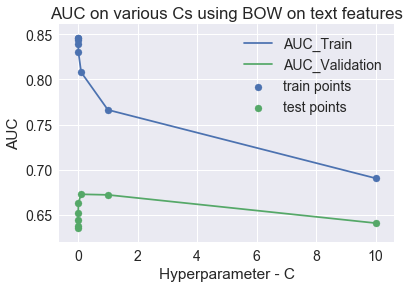

In [98]:
title1 = 'BOW'

C1, auc_tr1, auc_cv1 = getAUC(X_train_merged, y_train)
plotPerformance(C1, auc_tr1, auc_cv1, title1)
optimal_C1 = getOptimal_C(C1,auc_cv1)
print(optimal_C1)
lro1 = train_using_optimal_c(optimal_C1, X_test_merged, y_test)
roc_data_test1, roc_data_train1 , pred_y_test ,pred_y_train = getROCData(X_test_merged, y_test, X_train_merged, y_train, lro1)

In [99]:
clf =  MultinomialNB(alpha = optimal_C1,class_prior=[0.5,0.5])
get_top_features(optimal_C1,clf,X_train_merged,y_train,"BOW",X_train_merged.shape[0],"POSITIVE")

Top 10 features of positive class for BOW encoding :
Top 1 feature of positive class : soooo
Top 2 feature of positive class : price
Top 3 feature of positive class : quantity
Top 4 feature of positive class : prev_proposed_projects
Top 5 feature of positive class : Mrs
Top 6 feature of positive class : Literacy_Language
Top 7 feature of positive class : Math_Science
Top 8 feature of positive class : Ms
Top 9 feature of positive class : sld
Top 10 feature of positive class : todos


In [100]:
clf =  MultinomialNB(alpha = optimal_C1,class_prior=[0.5,0.5])
get_top_features(optimal_C1,clf,X_train_merged,y_train,"BOW",X_train_merged.shape[0],"NEGATIVE")

Top 10 features of negative class for BOW encoding :
Top 1 feature of negative class: soooo
Top 2 feature of negative class: quantity
Top 3 feature of negative class: price
Top 4 feature of negative class: prev_proposed_projects
Top 5 feature of negative class: Mrs
Top 6 feature of negative class: Literacy_Language
Top 7 feature of negative class: Math_Science
Top 8 feature of negative class: Ms
Top 9 feature of negative class: sld
Top 10 feature of negative class: todos


The auc score for train data : 0.6580511341850641 and test auc score : 0.8499784624316135


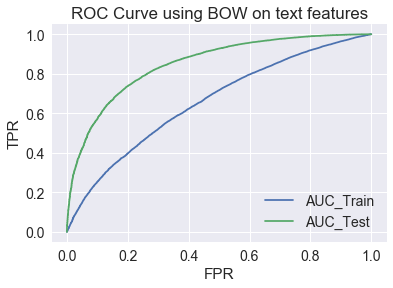

In [101]:
print("The auc score for train data :",auc(roc_data_train1[0],roc_data_train1[1]), "and test auc score :",auc(roc_data_test1[0],roc_data_test1[1]))
plotROC(roc_data_test1[0], roc_data_train1[0],roc_data_test1[1], roc_data_train1[1], title1)

Maximum value of tpr*(1-fpr) 0.37544683122447536 for optimal threshold 0.872366418925688


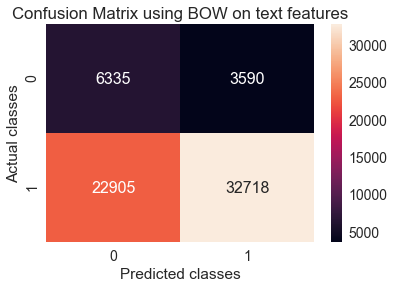

In [102]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train1[2],roc_data_train1[1],roc_data_train1[0], title1)

Maximum value of tpr*(1-fpr) 0.5924925094510531 for optimal threshold 0.8258022368276341


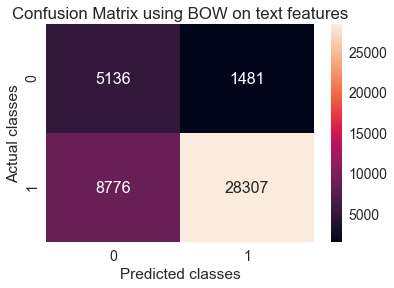

In [103]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test1[2],roc_data_test1[1],roc_data_test1[0], title1)

* ### $2.4.1$ Applying Logistic Regression on TFIDF encoding,<font color='yellow'> SET $2$</font>

In [104]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test_merged_tfidf = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test, test_title_tfidf, test_essay_tfidf)).tocsr()

print("FINAL DATA MATRIX FOR TFIDF")
print(X_train_merged_tfidf.shape, y_train.shape)
print(X_test_merged_tfidf.shape, y_test.shape)

FINAL DATA MATRIX FOR TFIDF
(65548, 18434) (65548,)
(43700, 18434) (43700,)


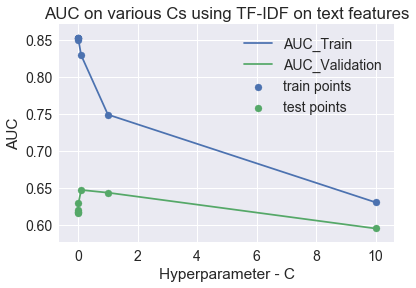

In [105]:
title2 = 'TF-IDF'

C2, auc_tr1, auc_cv1 = getAUC(X_train_merged_tfidf, y_train)
plotPerformance(C2, auc_tr1, auc_cv1, title2)
optimal_C2 = getOptimal_C(C2,auc_cv1)
lro1 = train_using_optimal_c(optimal_C2, X_test_merged_tfidf, y_test)
roc_data_test2, roc_data_train2 , pred_y_test ,pred_y_train = getROCData(X_test_merged_tfidf, y_test, X_train_merged_tfidf, y_train, lro1)

In [106]:
clf =  MultinomialNB(alpha = optimal_C2,class_prior=[0.5,0.5])
get_top_features(optimal_C2,clf,X_train_merged_tfidf,y_train,"TFIDF",X_train_merged.shape[0],"POSITIVE")

Top 10 features of positive class for Tfidf encoding :
Top 1 feature of negative class: quantity
Top 2 feature of negative class: price
Top 3 feature of negative class: prev_proposed_projects
Top 4 feature of negative class: Mrs
Top 5 feature of negative class: Literacy_Language
Top 6 feature of negative class: Math_Science
Top 7 feature of negative class: Ms
Top 8 feature of negative class: CA
Top 9 feature of negative class: Health_Sports
Top 10 feature of negative class: SpecialNeeds


In [107]:
clf =  MultinomialNB(alpha = optimal_C2,class_prior=[0.5,0.5])
get_top_features(optimal_C2,clf,X_train_merged_tfidf,y_train,"TFIDF",X_train_merged.shape[0],"NEGATIVE")

Top 10 features of negative class for Tfidf encoding :
Top 1 feature of negative class: price
Top 2 feature of negative class: quantity
Top 3 feature of negative class: prev_proposed_projects
Top 4 feature of negative class: Mrs
Top 5 feature of negative class: Literacy_Language
Top 6 feature of negative class: Math_Science
Top 7 feature of negative class: Ms
Top 8 feature of negative class: CA
Top 9 feature of negative class: SpecialNeeds
Top 10 feature of negative class: SpecialNeeds


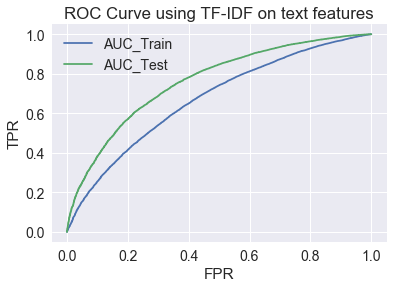

In [108]:
plotROC(roc_data_test2[0], roc_data_train2[0],roc_data_test2[1], roc_data_train2[1], title2)


Maximum value of tpr*(1-fpr) 0.3918954443713393 for optimal threshold 0.8438411131891075


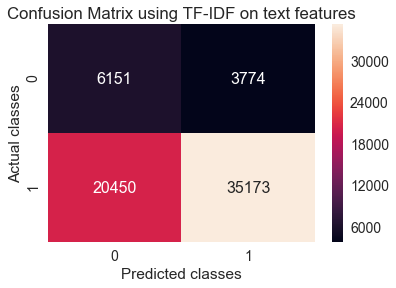

In [109]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train2[2],roc_data_train2[1],roc_data_train2[0], title2)

Maximum value of tpr*(1-fpr) 0.48416555616668017 for optimal threshold 0.8373848013258038


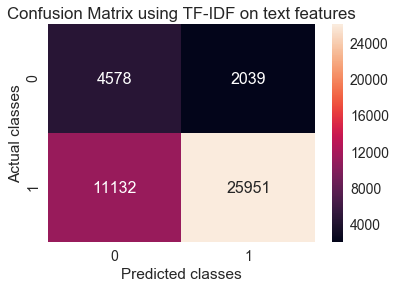

In [110]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test2[2],roc_data_test2[1],roc_data_test2[0], title2)

<h3>Conclusions:</h3>

In [111]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Vectorizer", "Hyper Parameter", "AUC Train" , "AUC test"]
table.add_row(["BOW", optimal_C1, auc(roc_data_train1[0],roc_data_train1[1]),auc(roc_data_test1[0],roc_data_test1[1])])
table.add_row(["TFIDF", optimal_C2, auc(roc_data_train2[0],roc_data_train2[1]),auc(roc_data_test2[0],roc_data_test2[1])])
print (table)

+------------+-----------------+--------------------+--------------------+
| Vectorizer | Hyper Parameter |     AUC Train      |      AUC test      |
+------------+-----------------+--------------------+--------------------+
|    BOW     |       0.1       | 0.6580511341850641 | 0.8499784624316135 |
|   TFIDF    |       0.1       | 0.6716746216692432 | 0.7618384237873508 |
+------------+-----------------+--------------------+--------------------+



1. We observe that the test auc is much higher than train auc.That may sometimes be an accident and might be an issue in data splitting strategy.So i changed the data splitting strategy and got similar results. 
2. Secondly it might be due to underfitting.However it is expected in Naive bayes model as we take assumptions about feature independence .